# MNIST Deep Learning

### Load the MNIST Dataset

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import TensorBoard
import time

#### Configuring tensorboard

In [2]:
tensorboard_callback = TensorBoard(log_dir=f'./logs/mnist{time.time()}',
                                   histogram_freq=1, write_graph=True)

#### Training and Test sets

In [3]:
# create training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sns.set(font_scale=2)

In [10]:
import numpy as np

In [11]:
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

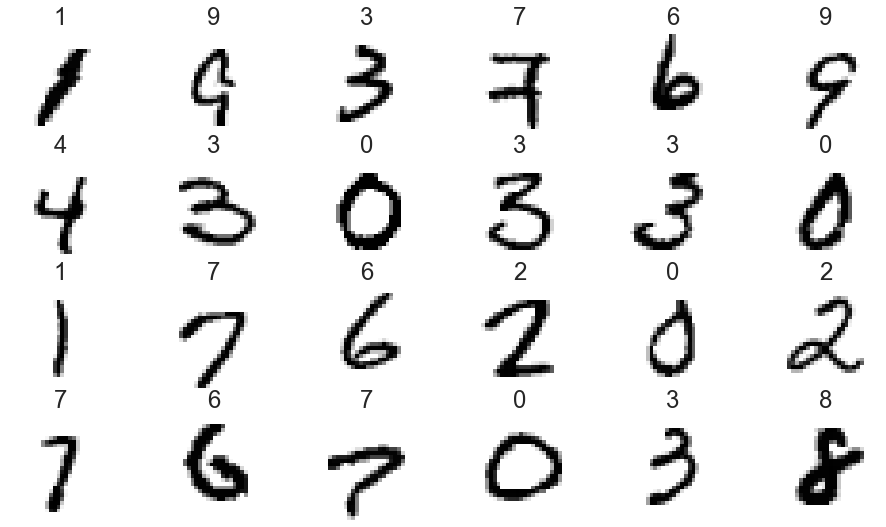

In [12]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))
for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout

### Data Preparation

#### Reshaping the Image data

In [13]:
X_train = X_train.reshape((60_000, 28, 28, 1))

In [14]:
X_train.shape

(60000, 28, 28, 1)

In [15]:
X_test = X_test.reshape((10_000, 28, 28, 1))

In [16]:
X_test.shape

(10000, 28, 28, 1)

#### Normalizing Image Data

In [17]:
# scale pixels 0.0 - 1.0 by dividing each pixel by 255 
X_train = X_train.astype('float32') / 255

In [18]:
X_test = X_test.astype('float32') / 255

#### One-Hot Encoding - Convert labels from integers to categorical data

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_train = to_categorical(y_train)

In [21]:
y_train.shape

(60000, 10)

In [22]:
# sample of the number five representation as categorical label
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
y_test = to_categorical(y_test)

In [24]:
y_test.shape

(10000, 10)

### Creating the Neural Network

In [25]:
from tensorflow.keras.models import Sequential

In [26]:
cnn = Sequential()

#### Adding Layers to the Network

In [27]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [28]:
# Add 1st convolution layer
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))

In [29]:
# Add a Pooling Layer
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [30]:
# add 2nd convolution layer and pooling Layer
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [31]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

#### Flattening the results

In [32]:
cnn.add(Flatten())

#### Add dense layer to reduce the number of features

In [33]:
cnn.add(Dense(units=128, activation='relu'))

#### Dense layer to produce final output

In [34]:
cnn.add(Dense(units=10, activation='softmax'))

#### Summary

In [35]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

#### Visualise the Model's Structure

In [36]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

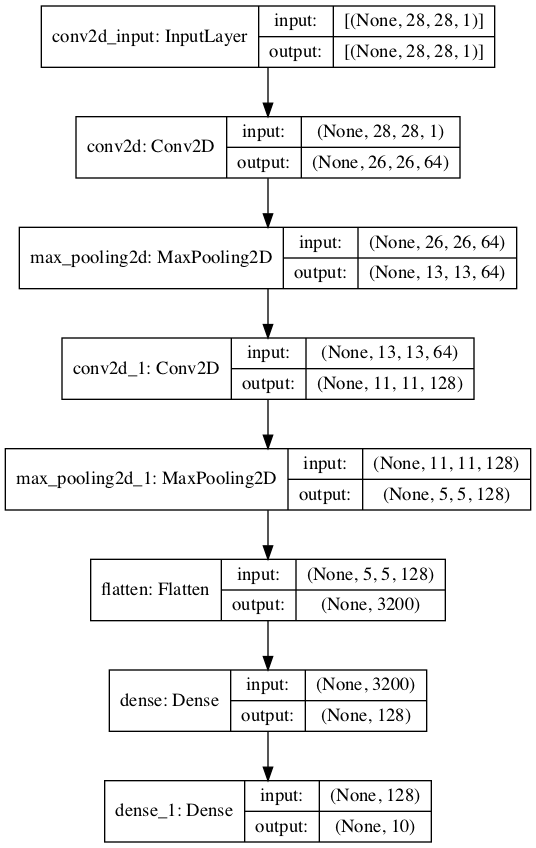

In [37]:
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

#### Compiling the Model

In [38]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

### Training and Evaluating the Model

In [39]:
cnn.fit(X_train, y_train, epochs=5, 
        batch_size=64, validation_split=0.1,
        callbacks=[tensorboard_callback])

Epoch 1/5
844/844 [==============================] - 41s 48ms/step - loss: 0.3398 - accuracy: 0.8950 - val_loss: 0.0433 - val_accuracy: 0.9880
Epoch 2/5
844/844 [==============================] - 37s 44ms/step - loss: 0.0445 - accuracy: 0.9859 - val_loss: 0.0344 - val_accuracy: 0.9898
Epoch 3/5
844/844 [==============================] - 38s 45ms/step - loss: 0.0293 - accuracy: 0.9903 - val_loss: 0.0543 - val_accuracy: 0.9843
Epoch 4/5
844/844 [==============================] - 37s 44ms/step - loss: 0.0192 - accuracy: 0.9936 - val_loss: 0.0425 - val_accuracy: 0.9890
Epoch 5/5
844/844 [==============================] - 38s 45ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0319 - val_accuracy: 0.9915


#### Evaluating the model

In [40]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0289 - accuracy: 0.9906


In [41]:
loss

0.028915688395500183

In [42]:
accuracy

0.9905999898910522

#### Making predictions

In [43]:
predictions = cnn.predict(X_test)

In [44]:
y_test[0] #7

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [45]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000670%
1: 0.0000000184%
2: 0.0000022070%
3: 0.0000119437%
4: 0.0000000000%
5: 0.0000000011%
6: 0.0000000000%
7: 99.9999046326%
8: 0.0000000212%
9: 0.0000857778%


#### Locating the incorrect predictions

In [46]:
images = X_test.reshape((10_000, 28, 28))

In [47]:
incorrect_predictions = []

In [48]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [49]:
# check the number of incorrect_predictions
len(incorrect_predictions)

94

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

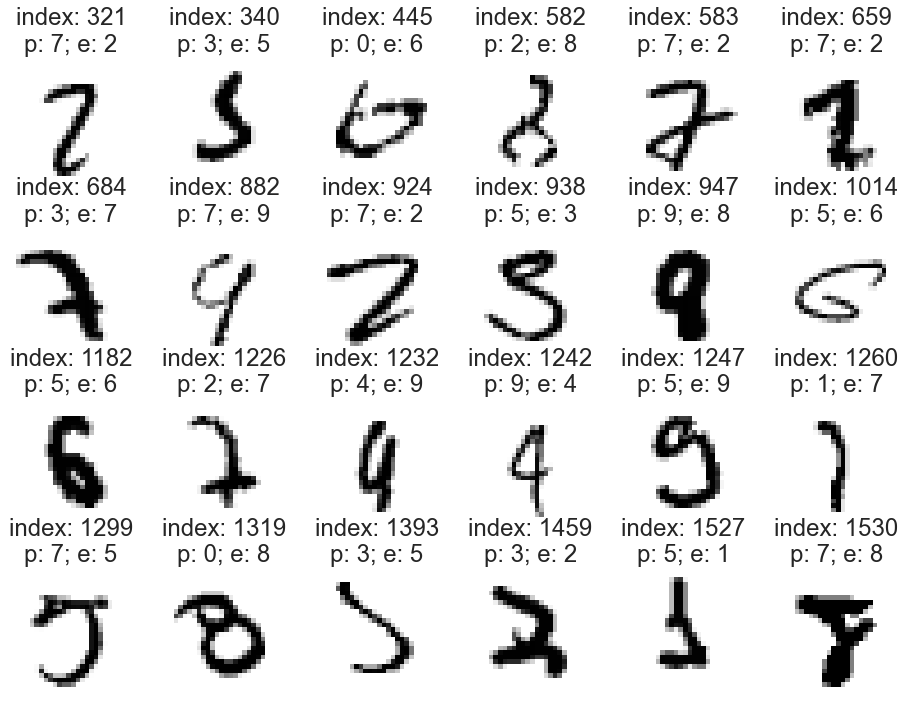

In [50]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(
        f'index: {index}\np: {predicted}; e: {expected}'
    )
plt.tight_layout

#### Probabilities for incorrect predictions

In [51]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [52]:
# number 6 predicted as 5 - index 1014
display_probabilities(predictions[1014])

0: 0.5096153822%
1: 0.0000017015%
2: 0.0004201437%
3: 0.0009593816%
4: 0.0000045324%
5: 99.4391024113%
6: 0.0167383361%
7: 0.0000134769%
8: 0.0329537492%
9: 0.0001960345%


In [53]:
# number 4 predicted as 6 - index 1112
display_probabilities(predictions[1112])

0: 0.4424768966%
1: 0.0017990486%
2: 0.0018515828%
3: 0.0000049591%
4: 88.8077795506%
5: 0.0000371142%
6: 10.7460029423%
7: 0.0000027035%
8: 0.0000079302%
9: 0.0000487828%


In [54]:
# number 8 predicted as number 2 - index 543
display_probabilities(predictions[543])

0: 0.0324251188%
1: 0.0082071463%
2: 1.0688107461%
3: 0.0807576173%
4: 0.0243178059%
5: 0.0105443767%
6: 0.0000228318%
7: 6.2668293715%
8: 65.6559884548%
9: 26.8520951271%


### Saving the model

In [55]:
# cnn.save('mnist_cnn.h5')